In [1]:
from keras import models
from keras.utils import plot_model
import pickle
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path_d = {'train_pics': "H:\\Downloads\\data_object_image_2\\training\\image_2",
          'train_labels': "H:\\Downloads\\data_object_label_2\\training\\label_2",
          'Car': "H:\\Databases\\data_object_cars\\processed",
          'Van': "H:\\Databases\\data_object_vans\\processed",
          'Truck': "H:\\Databases\\data_object_trucks\\processed",
          'Pedestrian': "H:\\Databases\\data_object_pedestrians\\processed",
          'Person_sitting': "H:\\Databases\\data_object_sittingpeople\\processed",
          'Cyclist': "H:\\Databases\\data_object_cyclists\\processed",
          'Tram': "H:\\Databases\\data_object_trams",
          'Misc': "H:\\Databases\\data_object_misc",
          'DontCare': "H:\\Databases\\data_object_dontcare",
          'Background': "H:\\Databases\\data_object_backgrounds",
          'MainDatabase': "H:\\Databases\\processed_database",
          'Model': "H:\\Databases\\model_weights"}

# List containing pictures with labels
main_database = []



Using TensorFlow backend.


In [2]:
def load_databases(path):
    global main_database
    loadf = open(path, "rb")
    main_database = pickle.load(loadf)
    loadf.close()



In [3]:
#############
# CONFIGURED PARAMETERS

load_path = path_d['MainDatabase'] + "\\maindata_20171028_225055_6.txt"
model_load_path = path_d['Model'] + "\\model_20171028_224634.hdf5"
used_labels = ['Car', 'Background', 'Pedestrian', 'Van', 'Truck', 'Cyclist']

picture_shape = (64, 64)
picture_array_shape = (64, 64, 3)

train_split = 0.6
valid_split = 0.25
batch_size = 100


load_databases(load_path)



In [6]:
#############
# CALCULATED PARAMETERS

num_labels = len(used_labels)
nb_samples = len(main_database)
nb_train_samples = math.floor(nb_samples * train_split)
nb_valid_samples = math.floor(nb_samples * valid_split)
nb_test_samples = nb_samples - nb_valid_samples - nb_train_samples

test_database = main_database[nb_train_samples + nb_valid_samples :]

test_x = np.array([row[0].reshape(64,64,3) for row in test_database])
test_y = np.array([row[1] for row in test_database])

test_database = None

model = models.load_model(model_load_path)

prediction = model.predict(test_x[0:batch_size], batch_size=batch_size, verbose=1)

100/100 [==============================] - 0s


[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]


H:\Programs\Anaconda_5.0.0\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]


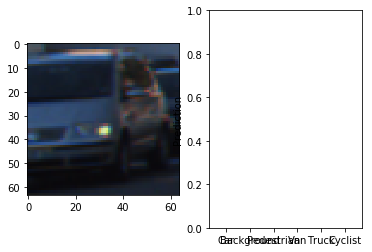

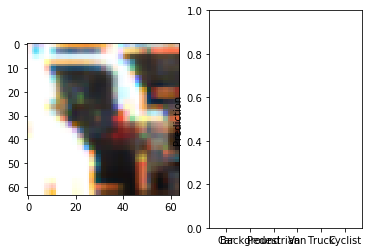

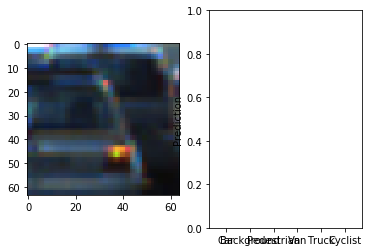

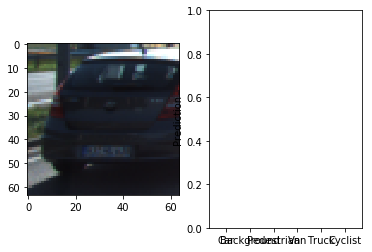

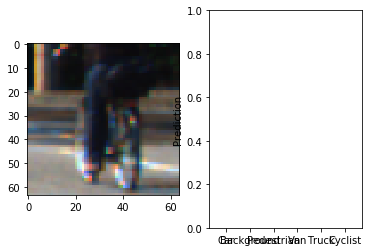

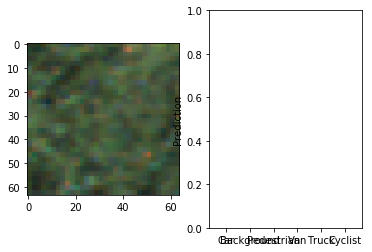

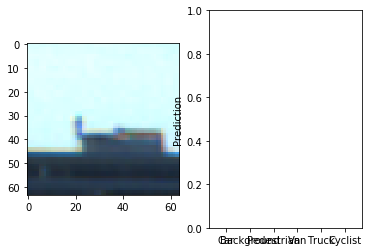

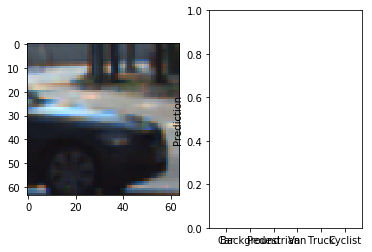

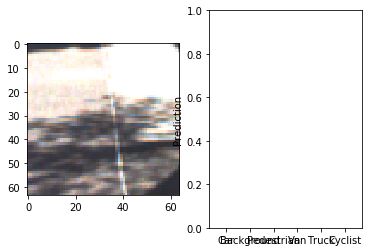

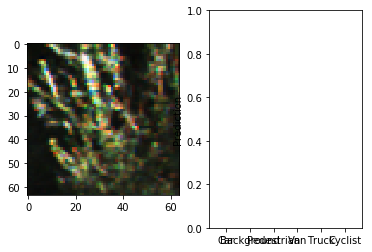

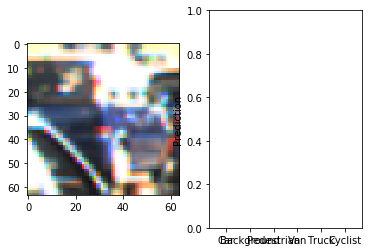

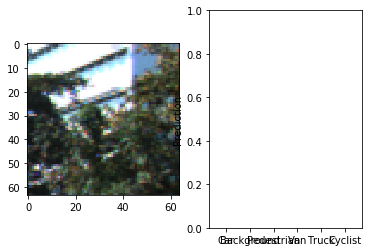

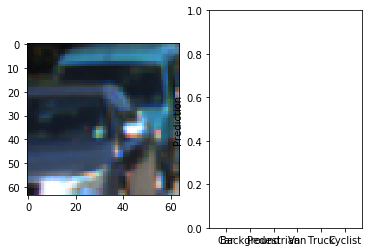

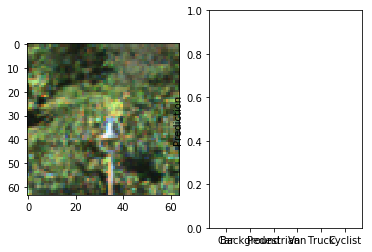

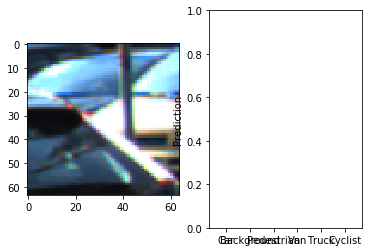

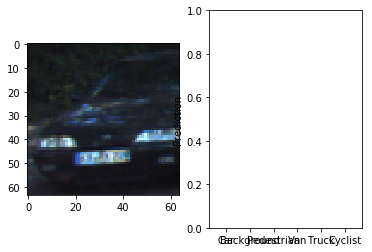

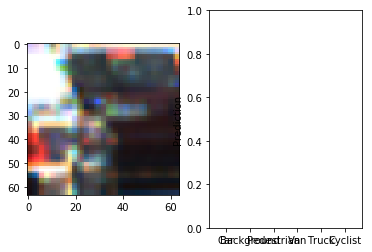

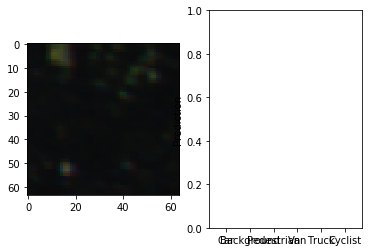

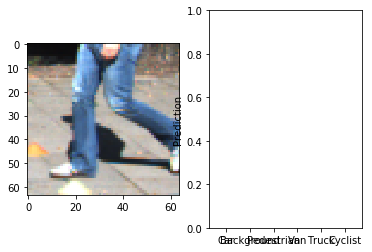

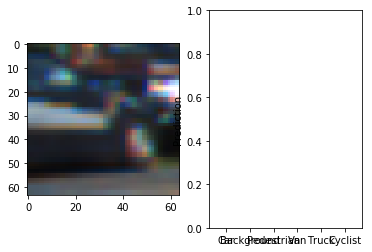

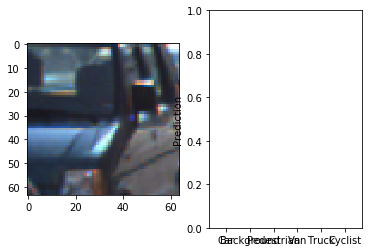

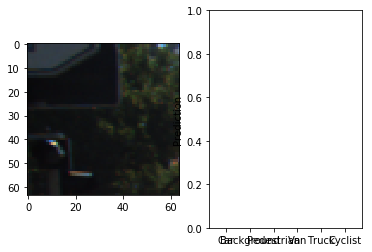

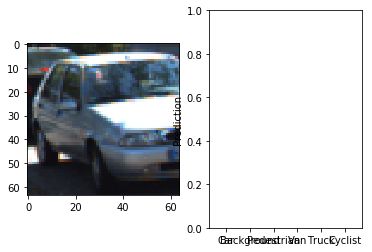

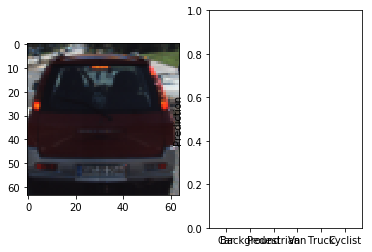

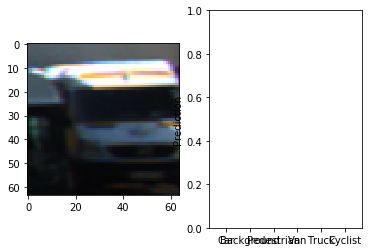

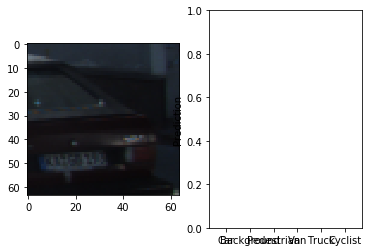

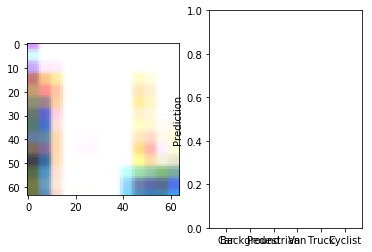

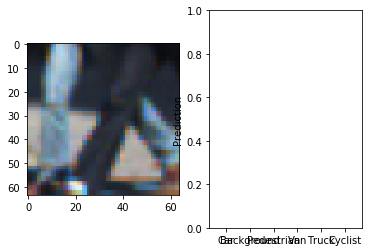

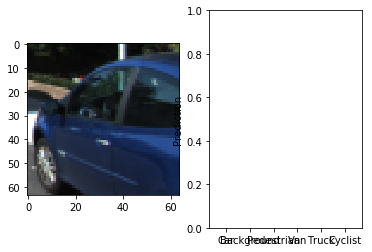

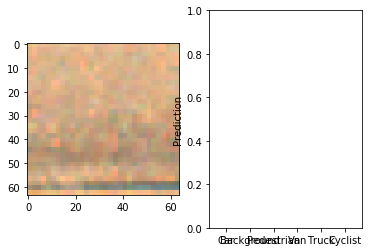

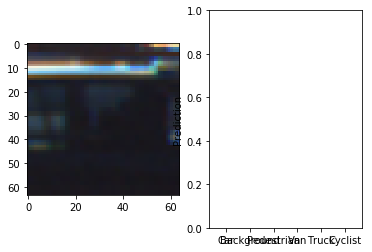

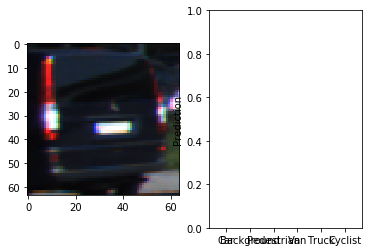

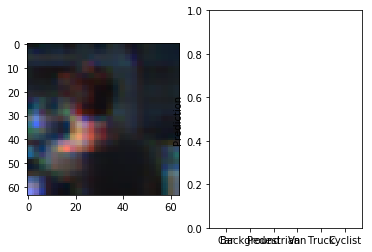

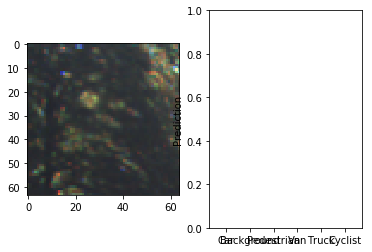

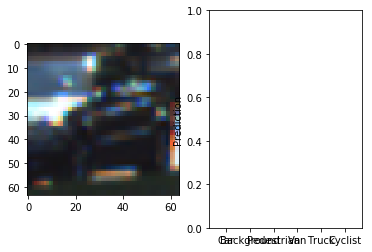

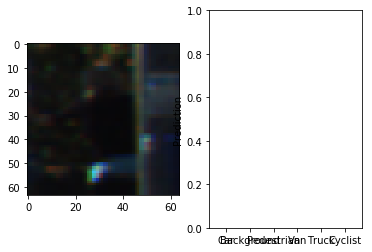

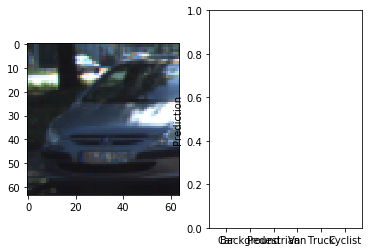

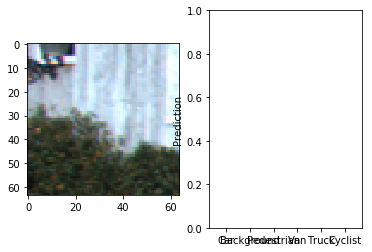

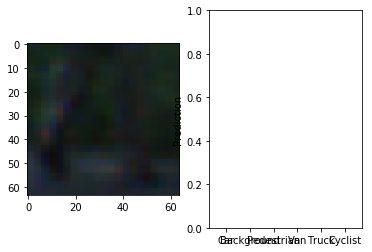

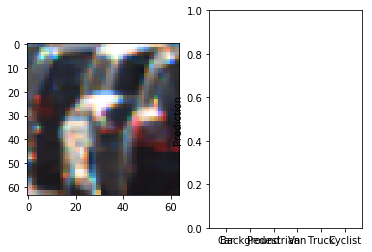

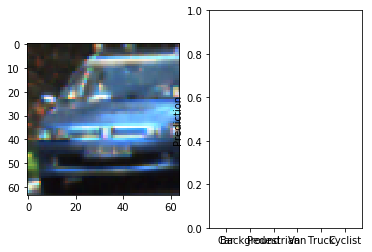

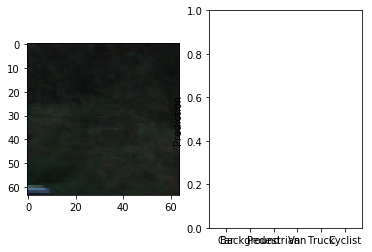

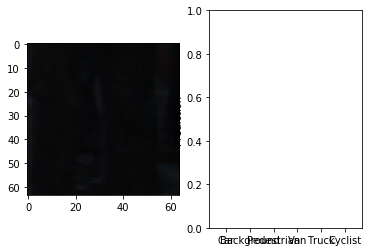

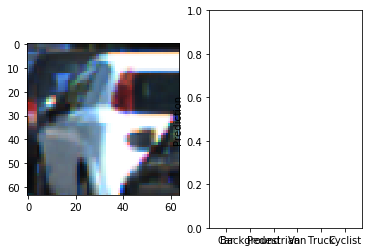

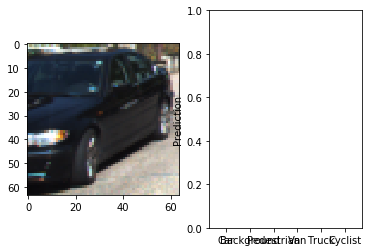

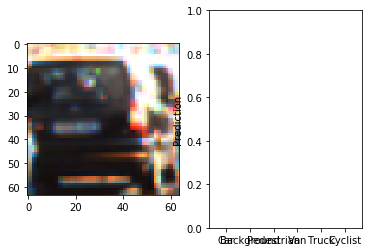

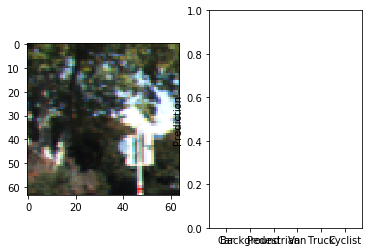

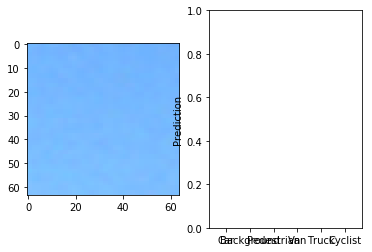

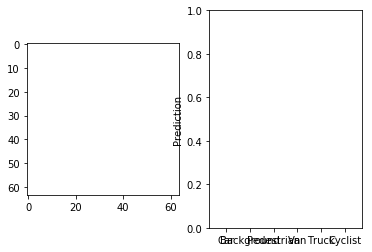

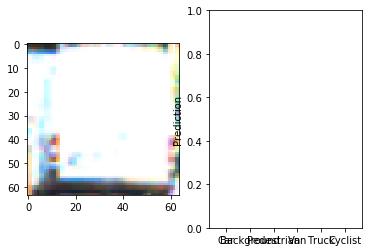

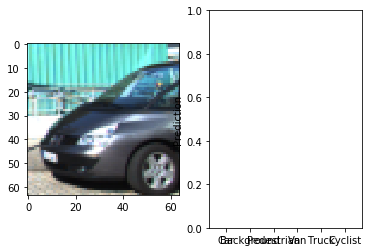

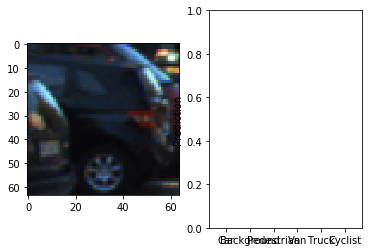

In [5]:
for i,item in enumerate(prediction):
    label_index_truth = np.where(np.asarray(test_y[i]) == 1)[0][0]
    label_index_predi = np.where(np.asarray(item) == np.max(item))[0][0]
    # text debug
    #print("Prediction: %.2f car, %.2f background." % (item[0], item[1]))
    #print("Truth: %s\n" % (used_labels[label_index_truth]))
    print(item)
    pic_array = test_x[i]
    img = Image.fromarray(pic_array.astype(np.uint8), 'RGB')
    
    # visual debug
    fig, ax = plt.subplots(1,2)
    
    ax[0].imshow(img)
    
    y_pos = np.arange(len(used_labels))
    plt.ylim(0,1)
    bars = ax[1].bar(y_pos, item, align='center', alpha=0.5, color='grey')
    ax[1].set_ylabel('Prediction')
    
    if label_index_truth == label_index_predi:
        bars[label_index_predi].set_color('g')
    else:
        bars[label_index_predi].set_color('r')
    plt.xticks(y_pos, used_labels)
    
    if i>50:
        break